<a href="https://colab.research.google.com/github/Amit-27214/Neural-Art-Tasks/blob/main/Task3_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Segmentation Task 1

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [30]:
im =  cv2.imread('/content/sample image.jpg') # Reads an image into RGB Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(1603, 908, 3)


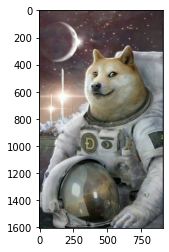

In [31]:
plt.imshow(im) # as RGB Format
plt.show()

In [32]:
# Flattening the image to convert multidimensinal to single dimesion
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(1455524, 3)


In [33]:
from sklearn.cluster import KMeans
clstr = 8  # cluster value to convert to desired segments  
km = KMeans(n_clusters= clstr)
km.fit(all_pixels)

KMeans()

In [34]:
centers = km.cluster_centers_
print(centers) # In RGB Format
# main RGB centers of segmented image

[[ 63.1960149   53.96781117  53.76018862]
 [187.02730518 186.13054374 182.29032037]
 [105.64771547 103.2539056   94.59457652]
 [225.23165451 223.70037259 219.65783379]
 [ 84.37246054  74.76792583  72.56493261]
 [159.41607806 157.46405556 152.13640956]
 [ 23.47464455  25.45698002  21.96502902]
 [131.76191199 130.96038188 123.31823452]]


In [35]:
centers = np.array(centers,dtype='uint8')

In [36]:
print(centers)

[[ 63  53  53]
 [187 186 182]
 [105 103  94]
 [225 223 219]
 [ 84  74  72]
 [159 157 152]
 [ 23  25  21]
 [131 130 123]]


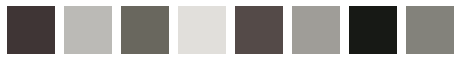

In [37]:
# displaying Main color components:
i = 1

plt.figure(0,figsize=(8,2))

# Storing info in color array
colors = []

for each_col in centers:
    plt.subplot(1,clstr,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

In [38]:
new_img = np.zeros((1603*908,3),dtype='uint8') # flattened image
print(new_img.shape)

(1455524, 3)


In [39]:
colors

[array([63, 53, 53], dtype=uint8),
 array([187, 186, 182], dtype=uint8),
 array([105, 103,  94], dtype=uint8),
 array([225, 223, 219], dtype=uint8),
 array([84, 74, 72], dtype=uint8),
 array([159, 157, 152], dtype=uint8),
 array([23, 25, 21], dtype=uint8),
 array([131, 130, 123], dtype=uint8)]

In [40]:
km.labels_

array([6, 6, 6, ..., 4, 0, 6], dtype=int32)

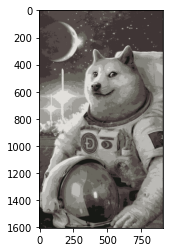

In [41]:
# Iterate over the image
#Displaying the segmented image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()
